In [1]:
# Import libraries 
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
%matplotlib inline
import math

In [2]:
# Load data
from vnstock import *
df =  stock_historical_data(symbol='MWG', 
                            start_date="2014-07-13", 
                            end_date='2022-11-03')
df

,Open,High,Low,Close,Volume,TradingDate
0,4389.0,4416.0,4389.0,4416.0,10660,2014-07-14
1,4714.0,4714.0,4714.0,4714.0,13480,2014-07-15
2,5039.0,5039.0,5039.0,5039.0,17290,2014-07-16
3,5391.0,5391.0,5391.0,5391.0,95120,2014-07-17
4,5743.0,5743.0,5743.0,5743.0,134460,2014-07-18
...,...,...,...,...,...,...
2075,53500.0,54400.0,52800.0,53200.0,1803002,2022-10-28
2076,52400.0,52900.0,49500.0,51600.0,3906387,2022-10-31
2077,52000.0,52500.0,50100.0,50100.0,2000853,2022-11-01
2078,50000.0,50300.0,46800.0,48000.0,4319689,2022-11-02


In [3]:
# Set index 
df = df.set_index('TradingDate')
df.head()

,Open,High,Low,Close,Volume
TradingDate,,,,,
2014-07-14,4389.0,4416.0,4389.0,4416.0,10660
2014-07-15,4714.0,4714.0,4714.0,4714.0,13480
2014-07-16,5039.0,5039.0,5039.0,5039.0,17290
2014-07-17,5391.0,5391.0,5391.0,5391.0,95120
2014-07-18,5743.0,5743.0,5743.0,5743.0,134460


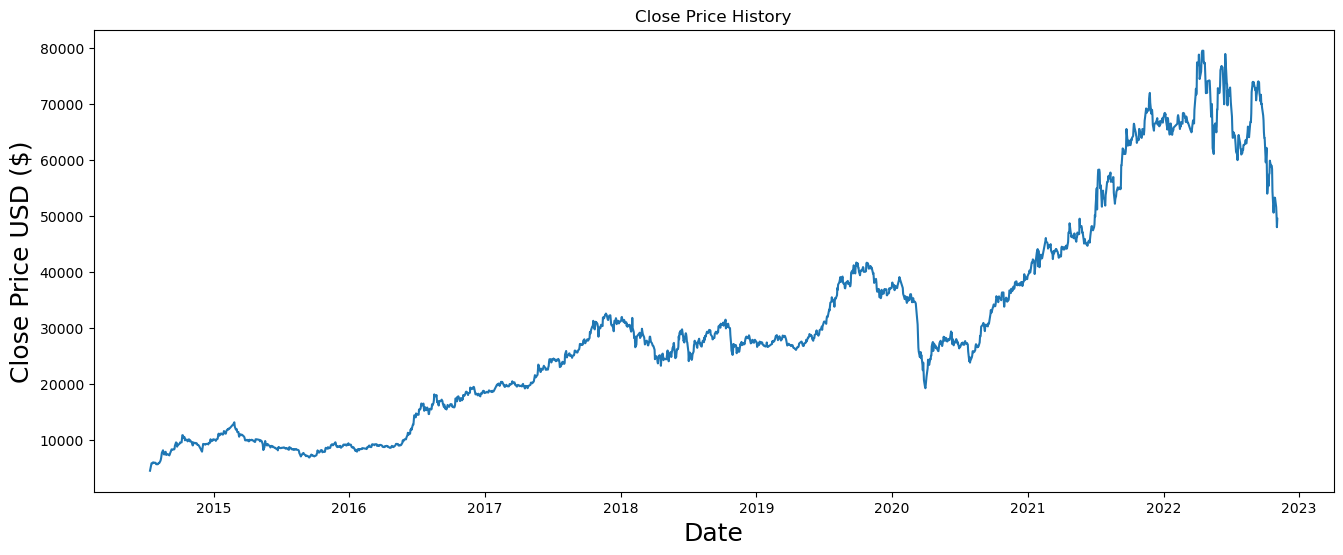

In [4]:
# Visualizing close price 
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.95))

training_data_len

1976

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

# Transform data to be values between 0 and 1 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00396472],
       [0.00828865],
       ...,
       [0.60779905],
       [0.57985977],
       [0.5998164 ]])

In [7]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.        , 0.00396472, 0.00828865, 0.01297181, 0.01765496,
       0.01765496, 0.01982358, 0.01982358, 0.01909184, 0.01909184,
       0.01909184, 0.01765496, 0.01765496, 0.01548634, 0.01548634,
       0.01548634, 0.01621809, 0.0183734 , 0.0183734 , 0.0183734 ,
       0.02341578, 0.02630284, 0.03062677, 0.03640089, 0.04288014,
       0.04865426, 0.04144326, 0.04144326, 0.0385562 , 0.04288014,
       0.04504876, 0.03783777, 0.04000639, 0.04000639, 0.0385562 ,
       0.0385562 , 0.03640089, 0.03927464, 0.0457672 , 0.04865426,
       0.05080957, 0.05080957, 0.05009114, 0.05080957, 0.05080957,
       0.05080957, 0.05225976, 0.05945745, 0.06738688, 0.06666844,
       0.06595   , 0.05730213, 0.06162607, 0.0623445 , 0.06306294,
       0.06378138, 0.06523156, 0.06738688, 0.06738688, 0.06738688])]
[0.07604805555925123]
[array([0.        , 0.00396472, 0.00828865, 0.01297181, 0.01765496,
       0.01765496, 0.01982358, 0.01982358, 0.01909184, 0.01909184,
       0.01909184, 0.01765496, 0.017

(1916, 60, 1)

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1916/1916 [==============================] - 137s 68ms/step - loss: 0.0013


In [9]:
# Create a new array containing scaled values 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6528\1399266118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


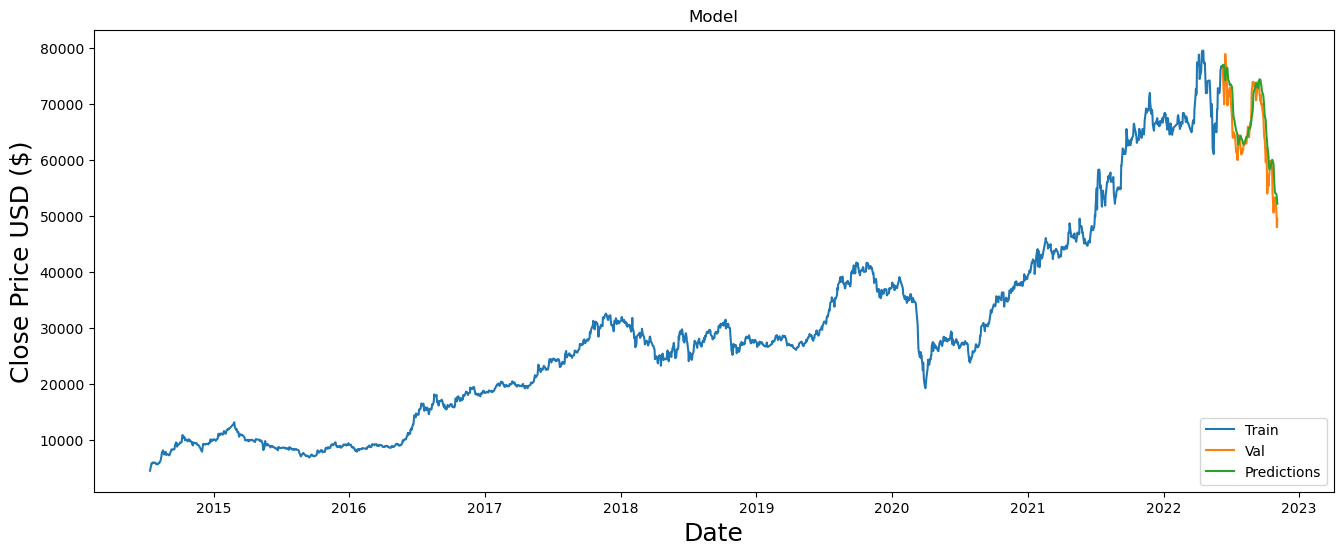

In [10]:
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [11]:
valid

,Close,Predictions
TradingDate,,
2022-06-09,76400.0,76707.359375
2022-06-10,75000.0,77071.335938
2022-06-13,70000.0,76983.359375
2022-06-14,71750.0,75768.007812
2022-06-15,73850.0,74698.578125
...,...,...
2022-10-28,53200.0,54140.101562
2022-10-31,51600.0,53970.820312
2022-11-01,50100.0,53696.199219


In [12]:
# Get the last 60 days closing price values and convert the dataframe to an array 
last_60_days = df[-60:].filter(['Close']).values

# Scale the data to be values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list 
x_test = []

# Append the past 60 days 
x_test.append(last_60_days_scaled)

# Convert the x_test data set to a numpy array 
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted scaled price 
pred_price = model.predict(x_test)

# Predict the close price on 2022-11-04
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[51510.098]]
